In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn

In [3]:
X  = torch.linspace(1,50,50).reshape(-1,1)

In [4]:
X.shape

torch.Size([50, 1])

In [5]:
torch.manual_seed(71)

In [6]:
e = torch.randint(-8,9,(50,1) )

In [7]:
y = 2*X + 1 + e

In [8]:
y.dtype

torch.float32

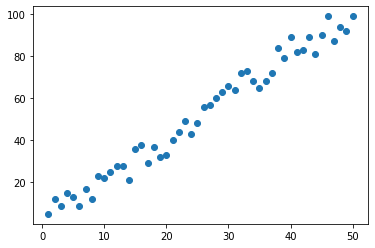

In [9]:
plt.scatter(X.numpy(),y.numpy())

In [10]:
torch.manual_seed(59)

In [11]:
model= nn.Linear(in_features = 1, out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [12]:
 class Model(nn.Module):
        def __init__(self,in_features,out_features):
            super().__init__()
            self.linear = nn.Linear(in_features,out_features)
            
        def forward(self, x):
            y_pred = self.linear(x)
            return y_pred

In [13]:
torch.manual_seed(59)

In [14]:
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [15]:
for name, param in model.named_parameters():
    print(f'{name} {param.item()}')


linear.weight 0.10597813129425049
linear.bias 0.9637961387634277


In [16]:
w1 = 0.10597813129425049
b = 0.9637961387634277

In [17]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [18]:
2*w1+b

1.1757524013519287

In [19]:
x1 = np.linspace(0.0,50,50)

In [20]:
y_pred = x1*w1+b

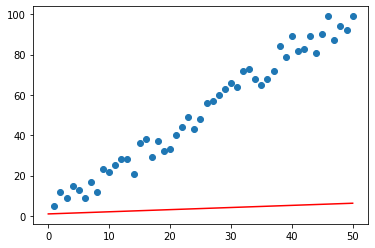

In [21]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y_pred,'r')

This was with no cost/optimisation/backprop

In [22]:
criterion = nn.MSELoss()

In [23]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.001)

https://stackoverflow.com/questions/53975717/pytorch-connection-between-loss-backward-and-optimizer-step

In [24]:
epoch = 50
losses = []

for i in range(epoch):
    i +=1
    y_pred = model.forward(X)
    loss = criterion(y_pred,y)
    losses.append(loss.item())
    
    print(f'epoch {i} loss : {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
    
    optimizer.zero_grad()
    
    loss.backward() #kicks the backpropagation
    
    optimizer.step() #optimiser

epoch 1 loss : 3057.216552734375 weight: 0.10597813129425049 bias: 0.9637961387634277
epoch 2 loss : 1588.5311279296875 weight: 3.334900379180908 bias: 1.0604636669158936
epoch 3 loss : 830.300048828125 weight: 1.0148327350616455 bias: 0.9922628402709961
epoch 4 loss : 438.8524169921875 weight: 2.6817996501922607 bias: 1.0425218343734741
epoch 5 loss : 236.7615203857422 weight: 1.4840211868286133 bias: 1.0076650381088257
epoch 6 loss : 132.42910766601562 weight: 2.3446059226989746 bias: 1.0339646339416504
epoch 7 loss : 78.56573486328125 weight: 1.7262253761291504 bias: 1.0163217782974243
epoch 8 loss : 50.75776290893555 weight: 2.170504093170166 bias: 1.0302516222000122
epoch 9 loss : 36.40123748779297 weight: 1.8512457609176636 bias: 1.0214954614639282
epoch 10 loss : 28.989225387573242 weight: 2.0806007385253906 bias: 1.029038906097412
epoch 11 loss : 25.162382125854492 weight: 1.9157683849334717 bias: 1.0248701572418213
epoch 12 loss : 23.186471939086914 weight: 2.034165620803833 b

Text(0.5, 0, 'Epoch ')

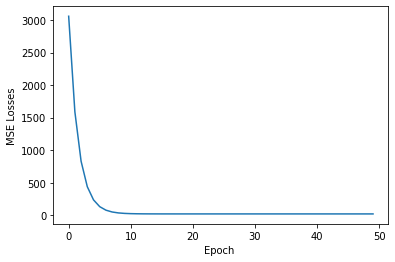

In [25]:
plt.plot(range(epoch),losses)
plt.ylabel('MSE Losses')
plt.xlabel('Epoch ')

In [26]:
x = np.linspace(0.0,50,50)
current_weight = 1.9838409423828125
current_bias = 1.055037498474121
predicted_y = current_weight*x +current_bias

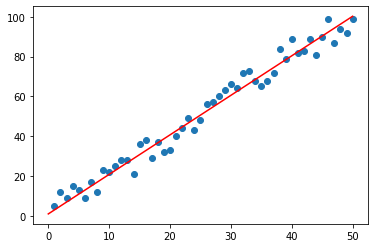

In [27]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(x,predicted_y,'r')